In [1]:
# %matplotlib inline

import numpy as np
import pandas as pd
import gensim
import utils
import re  
import seaborn as sns
import warnings
import xgboost as xgb
from sklearn.manifold import TSNE
# from utils import word_vector
from sklearn import preprocessing
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from collections import defaultdict  # For word frequency
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from utils import hyperparameterTuning_RandomForest
from utils import hyperparameterTuning_XGBoost
from utils import hyperparameterTuning_MLP
from utils import plot_feature_importance
from utils import featureScore
from utils import folderPath
from utils import metrics
from utils import removeColumnContainString
from utils import Feature_Extraction
from utils import Normalizing

random_state=2022

In [2]:
figurePath=folderPath('SavedFigures')
datasetePath=folderPath('Dataset')  

1
1


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
path='/content/drive/MyDrive/NLP/'
df=pd.read_csv(path + '3.csv')

## Skipgram

### caption

In [5]:
tokenized_caption = df['caption'].apply(lambda x: str(x).split()) # tokenizing 
model_w2v_caption = gensim.models.Word2Vec(tokenized_caption,
        size=100, # desired no. of features/independent variables
        window=5, # context window size
        min_count=2, # Ignores all words with total frequency lower than 2.                                  
        sg = 1, # 1 for skip-gram model
        hs = 0,
        negative = 10, # for negative sampling
        workers= 32 # no.of cores
        )
model_w2v_caption.train(tokenized_caption, total_examples= len(df['caption']), epochs=20)
# model_w2v_caption.save(path + "Save Models\\200_Word2vec_Skipgram_Caption.model")

(22080207, 23299480)

In [6]:
def word_vector(tokens, size,model):
    vec = np.zeros(size).reshape((1, size))
    count = 0
    for word in tokens:
        try:
            vec += model[word].reshape((1, size))
            count += 1
        except KeyError:
            continue
    if count != 0:
        vec /= count
    return vec

In [7]:
wordvec_arrays = np.zeros((len(tokenized_caption), 100)) 
for i in range(len(tokenized_caption)):
    wordvec_arrays[i,:] = word_vector(tokenized_caption[i], 100,model_w2v_caption)
w2v_df_caption = pd.DataFrame(wordvec_arrays)
w2v_df_caption.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


(41741, 100)

### hastags

In [8]:
tokenized_hashtags = df['hashtags'].apply(lambda x: str(x).split()) # tokenizing 
model_w2v_hashtags = gensim.models.Word2Vec(tokenized_hashtags,
        size=100, # desired no. of features/independent variables
        window=5, # context window size
        min_count=2, # Ignores all words with total frequency lower than 2.                                  
        sg = 1, # 1 for skip-gram model
        hs = 0,
        negative = 10, # for negative sampling
        workers= 32 # no.of cores
        )
model_w2v_hashtags.train(tokenized_hashtags, total_examples= len(df['hashtags']), epochs=20)
# model_w2v_caption.save(path + "Save Models\\200_Word2vec_Skipgram_Caption.model")

(5333208, 6208540)

In [9]:
wordvec_arrays = np.zeros((len(tokenized_hashtags), 100)) 
for i in range(len(tokenized_hashtags)):
    wordvec_arrays[i,:] = word_vector(tokenized_hashtags[i], 100,model_w2v_hashtags)
w2v_df_hashtags = pd.DataFrame(wordvec_arrays)
w2v_df_hashtags.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


(41741, 100)

### emojiText

In [10]:
tokenized_emojiText = df['emoji_text'].apply(lambda x: str(x).split()) # tokenizing 
model_w2v_emojiText = gensim.models.Word2Vec(tokenized_emojiText,
        size=100, # desired no. of features/independent variables
        window=5, # context window size
        min_count=2, # Ignores all words with total frequency lower than 2.                                  
        sg = 1, # 1 for skip-gram model
        hs = 0,
        negative = 10, # for negative sampling
        workers= 32 # no.of cores
        )
model_w2v_emojiText.train(tokenized_emojiText, total_examples= len(df['emoji_text']), epochs=20)
# model_w2v_caption.save(path + "Save Models\\200_Word2vec_Skipgram_Caption.model")

(2700347, 3976140)

In [11]:
wordvec_arrays = np.zeros((len(tokenized_emojiText), 100)) 
for i in range(len(tokenized_emojiText)):
    wordvec_arrays[i,:] = word_vector(tokenized_emojiText[i], 100,model_w2v_emojiText)
w2v_df_emojiText = pd.DataFrame(wordvec_arrays)
w2v_df_emojiText.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


(41741, 100)

### Mentions

In [12]:
tokenized_mentions = df['mentions'].apply(lambda x: str(x).split()) # tokenizing 
model_w2v_mentions = gensim.models.Word2Vec(tokenized_mentions,
        size=100, # desired no. of features/independent variables
        window=5, # context window size
        min_count=2, # Ignores all words with total frequency lower than 2.                                  
        sg = 1, # 1 for skip-gram model
        hs = 0,
        negative = 10, # for negative sampling
        workers= 32 # no.of cores
        )
model_w2v_mentions.train(tokenized_mentions, total_examples= len(df['mentions']), epochs=20)
# model_w2v_caption.save(path + "Save Models\\200_Word2vec_Skipgram_Caption.model")

(291955, 1015580)

In [13]:
wordvec_arrays = np.zeros((len(tokenized_mentions), 100)) 
for i in range(len(tokenized_mentions)):
    wordvec_arrays[i,:] = word_vector(tokenized_mentions[i], 100,model_w2v_mentions)
w2v_df_mentions = pd.DataFrame(wordvec_arrays)
w2v_df_mentions.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


(41741, 100)

In [14]:
w2v_Df = pd.DataFrame(np.hstack((w2v_df_caption,w2v_df_hashtags,w2v_df_emojiText,w2v_df_mentions, df)))

In [15]:
w2v_Df

,0,1,2,3,4,5,6,7,8,9,...,418,419,420,421,422,423,424,425,426,427
0,0.115672,-0.17471,0.243352,0.119917,-0.257764,-0.232581,0.074268,0.139744,-0.281599,-0.13784,...,0.282576,"'#londontesting', '#chelseabridgeclinic', '#lo...",8,NaN,0,"['⏱', '📄', '🧑🏻\u200d⚕️', '👨\u200d👩\u200d👧\u200...","'stopwatch', 'page facing up', 'health worker:...",10,860,3219.75
1,0.258748,-0.217826,0.109719,0.1062,-0.149786,-0.150608,-0.030474,0.083136,-0.257743,-0.205706,...,0.168056,"'#thankyou', '#thankful', '#feedback', '#chlse...",9,NaN,0,"['👏', '🧡']","'clapping hands', 'orange heart'",2,716,5178.333333
2,0.0307,-0.646133,0.079327,0.456535,-0.077451,-0.072032,0.367206,-0.199024,-0.275215,-0.12153,...,0.0,"'#edinburghfoodies', '#edinburghrestaurants', ...",25,NaN,0,[],NaN,0,425,17663.68
3,0.013781,-0.463082,0.490759,0.728174,-0.185935,-0.175751,-0.010929,0.011535,-0.488713,-0.276619,...,0.25,"'#michelin', '#michelinstar', '#michelinuk', '...",28,NaN,0,[],NaN,0,490,16841.857143
4,0.270772,-0.489131,0.367619,0.350594,-0.3103,0.185742,0.007731,-0.033354,-0.334599,-0.011165,...,0.166667,"'#michelin', '#michelinstar', '#michelinuk', '...",28,"'@castlegamescotland', '@wellocksfood'",2,[],NaN,0,530,16841.857143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41736,0.211733,-0.225089,0.286027,0.153425,-0.273194,-0.084864,-0.074416,0.207778,-0.262962,-0.066674,...,0.42803,"'#lookingforward', '#theatreland', '#performin...",6,"'@evening', '@tiktok', '@nationalyouththeatre'...",4,[],NaN,0,878,153640.333333
41737,0.069767,-0.362688,0.309612,0.190129,-0.330334,-0.16555,-0.09481,0.057453,-0.228239,0.003612,...,0.491667,"'#lookingforward', '#travelinspiration', '#lov...",7,'@youmustgoblog',1,['🍾'],'bottle with popping cork',1,532,81714.428571
41738,0.186997,-0.170459,0.18412,0.227502,-0.261476,-0.184079,-0.11777,-0.018333,-0.212092,-0.081439,...,0.260417,"'#lookingforward', '#londonviews', '#prettycit...",8,'@damienhewetson',1,[],NaN,0,479,102699.125
41739,0.200712,-0.24266,0.190399,0.251344,-0.353561,-0.127118,-0.09295,0.124974,-0.222119,-0.072881,...,0.445833,"'#lookingforward', '#travelinspo', '#datenight...",7,NaN,0,[],NaN,0,643,70165.571429


In [16]:
print(len(w2v_Df.columns))
a=len(w2v_Df.columns)-25+1
print(a)
w2v_Df[len(w2v_Df.columns)-28+1]
w2v_Df.rename(columns = {a:'likes'}, inplace = True)
df=utils.removeColumnContainString(w2v_Df)

428
404
Couldn't covert 402 to float
Couldn't covert 419 to float
Couldn't covert 421 to float
Couldn't covert 423 to float
Couldn't covert 424 to float


In [17]:
df = pd.DataFrame(df)
data=df.astype(str)

normalizer = preprocessing.MinMaxScaler(feature_range=(0, 1))
normalized_df = pd.DataFrame(normalizer.fit_transform(data),  columns = data.columns)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [18]:
dropped = [106,108,109,111,112,113]
normalized_df = normalized_df.drop(dropped,axis=1)
normalized_df

,0,1,2,3,4,5,6,7,8,9,...,414,415,416,417,418,420,422,425,426,427
0,0.554567,0.756947,0.587082,0.517741,0.584964,0.460888,0.490690,0.629494,0.503794,0.467767,...,0.0,0.0,0.0,0.632390,0.641288,0.166667,0.000000,0.192308,0.390632,0.005571
1,0.626342,0.742618,0.520016,0.511401,0.650069,0.508285,0.439767,0.600605,0.513869,0.438386,...,0.0,0.0,0.0,0.405556,0.584028,0.187500,0.000000,0.038462,0.325148,0.008959
2,0.511940,0.600270,0.504763,0.673334,0.693682,0.553717,0.633109,0.456608,0.506490,0.474828,...,0.0,1.0,0.0,0.000000,0.500000,0.520833,0.000000,0.000000,0.192815,0.030561
3,0.503453,0.661107,0.711248,0.798891,0.628273,0.493747,0.449270,0.564064,0.416325,0.407685,...,0.0,0.0,0.0,0.333333,0.625000,0.583333,0.000000,0.000000,0.222374,0.029139
4,0.632374,0.652449,0.649448,0.624365,0.553288,0.702763,0.458342,0.541156,0.481411,0.522608,...,0.0,0.0,0.0,0.333333,0.583333,0.583333,0.057143,0.000000,0.240564,0.029139
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41736,0.602757,0.740204,0.608499,0.533230,0.575661,0.546298,0.418404,0.664214,0.511665,0.498576,...,1.0,0.0,0.0,0.506629,0.714015,0.125000,0.114286,0.000000,0.398818,0.265825
41737,0.531538,0.694473,0.620336,0.550195,0.541209,0.499646,0.408489,0.587498,0.526329,0.529005,...,0.0,0.0,0.0,0.416667,0.745833,0.145833,0.028571,0.019231,0.241473,0.141381
41738,0.590348,0.758360,0.557355,0.567469,0.582726,0.488932,0.397326,0.548821,0.533149,0.492184,...,0.0,0.0,0.0,0.510417,0.630208,0.166667,0.028571,0.000000,0.217372,0.177688
41739,0.597228,0.734364,0.560507,0.578490,0.527204,0.521866,0.409393,0.621956,0.528914,0.495889,...,0.0,0.0,0.0,0.708333,0.722917,0.145833,0.000000,0.000000,0.291951,0.121399


In [19]:
y=normalized_df['likes']                #Target Variable 
X = normalized_df.drop('likes', axis=1) #Feature Matrix 

In [20]:
x_train_w2v_df, x_test_w2v_df, y_train_w2v_df, y_test_w2v_df = train_test_split(X, y, test_size=0.2)

In [21]:
x_train_w2v_df.shape ,y_train_w2v_df.shape

((33392, 416), (33392,))

## XGboost Model

In [22]:
# utils.hyperparameterTuning_XGBoost(x_train_w2v_df,y_train_w2v_df)
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.7, learning_rate = 0.03,max_depth = 5, min_child_weight=4,nthread = 4, n_estimators = 500,subsample=0.7)
xg_reg.fit(x_train_w2v_df, y_train_w2v_df)
y_pred_W2vec_xgboost = xg_reg.predict(x_test_w2v_df)

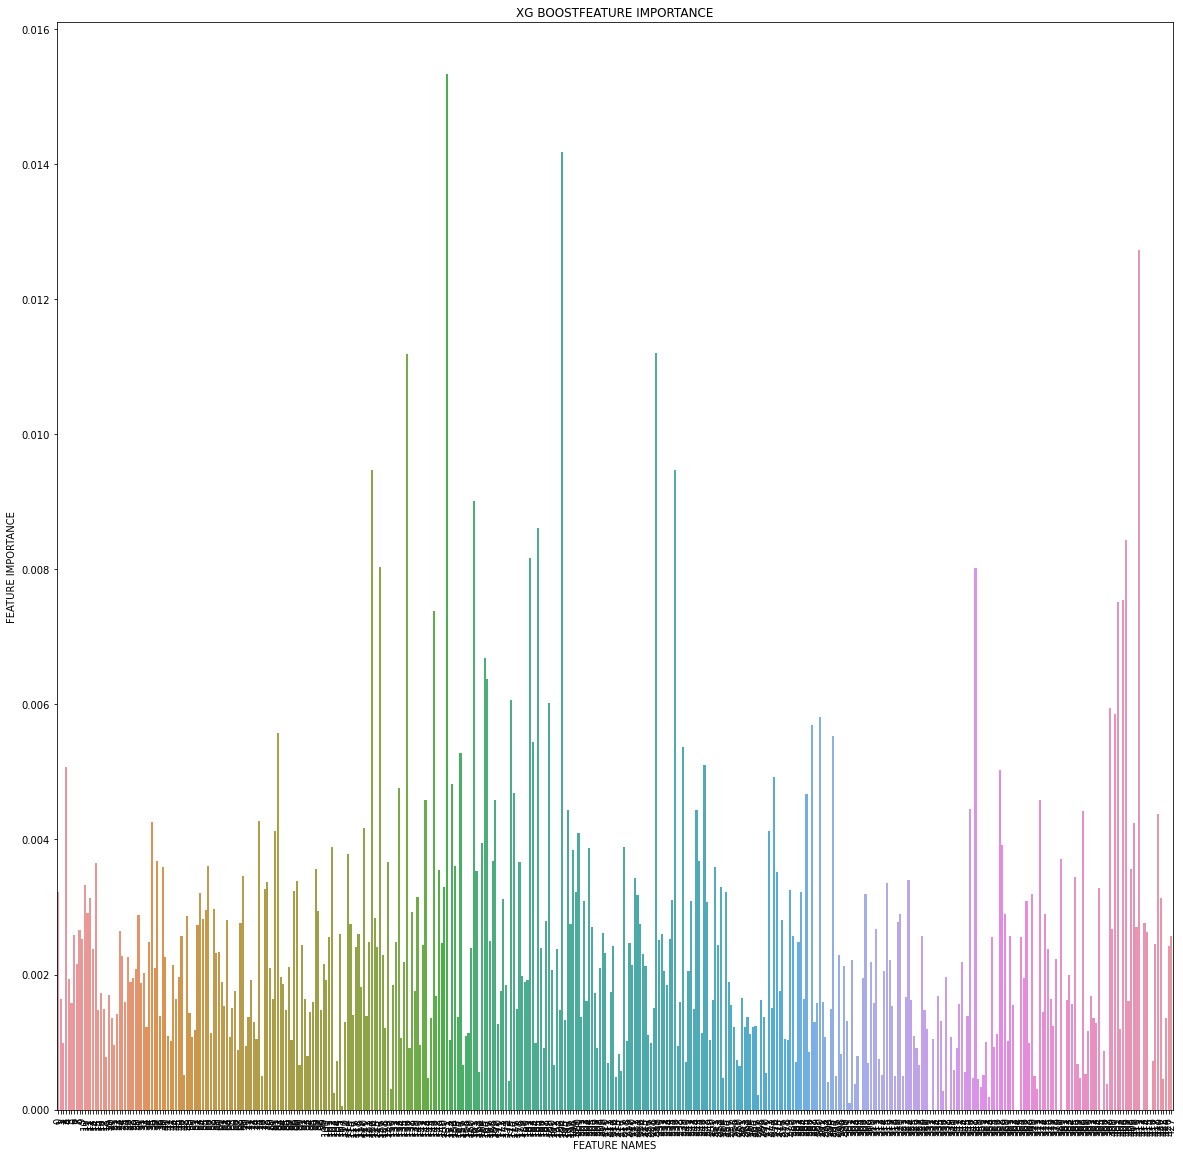

In [24]:
utils.plot_feature_importance(xg_reg.feature_importances_,x_train_w2v_df.columns,'XG BOOST')

In [25]:
featureScore(xg_reg.feature_importances_)

Feature: 0, Score: 0.00323
Feature: 1, Score: 0.00164
Feature: 2, Score: 0.00099
Feature: 3, Score: 0.00507
Feature: 4, Score: 0.00193
Feature: 5, Score: 0.00158
Feature: 6, Score: 0.00259
Feature: 7, Score: 0.00215
Feature: 8, Score: 0.00266
Feature: 9, Score: 0.00252
Feature: 10, Score: 0.00333
Feature: 11, Score: 0.00291
Feature: 12, Score: 0.00314
Feature: 13, Score: 0.00239
Feature: 14, Score: 0.00365
Feature: 15, Score: 0.00147
Feature: 16, Score: 0.00173
Feature: 17, Score: 0.00149
Feature: 18, Score: 0.00078
Feature: 19, Score: 0.00169
Feature: 20, Score: 0.00135
Feature: 21, Score: 0.00095
Feature: 22, Score: 0.00141
Feature: 23, Score: 0.00264
Feature: 24, Score: 0.00228
Feature: 25, Score: 0.00160
Feature: 26, Score: 0.00225
Feature: 27, Score: 0.00190
Feature: 28, Score: 0.00195
Feature: 29, Score: 0.00208
Feature: 30, Score: 0.00289
Feature: 31, Score: 0.00187
Feature: 32, Score: 0.00202
Feature: 33, Score: 0.00123
Feature: 34, Score: 0.00248
Feature: 35, Score: 0.00425
Fe

In [26]:
dict_info = {'Model': [], 'RMSE': [], 'R2': [],'MAE': [], 'RMSLE': [],'max_error_':[]}

rmse,R2,MAE,MSE,RMSLE,max_error_= metrics(y_test_w2v_df,y_pred_W2vec_xgboost)

dict_info['Model'].append('XGboost')
dict_info['RMSE'].append(rmse)
dict_info['R2'].append(R2)
dict_info['MAE'].append(MAE)
dict_info['RMSLE'].append(RMSLE)
dict_info['max_error_'].append(max_error_)

## Random Forest

In [27]:
# utils.hyperparameterTuning_RandomForest(x_train_w2v_df,y_train_w2v_df)
rnd_clf = RandomForestRegressor(n_estimators=20, min_samples_split=10, min_samples_leaf=4,max_features='sqrt',max_depth=10,bootstrap=True)
rnd_clf.fit(x_train_w2v_df, y_train_w2v_df)
y_pred_w2vec_rnd = rnd_clf.predict(x_test_w2v_df)

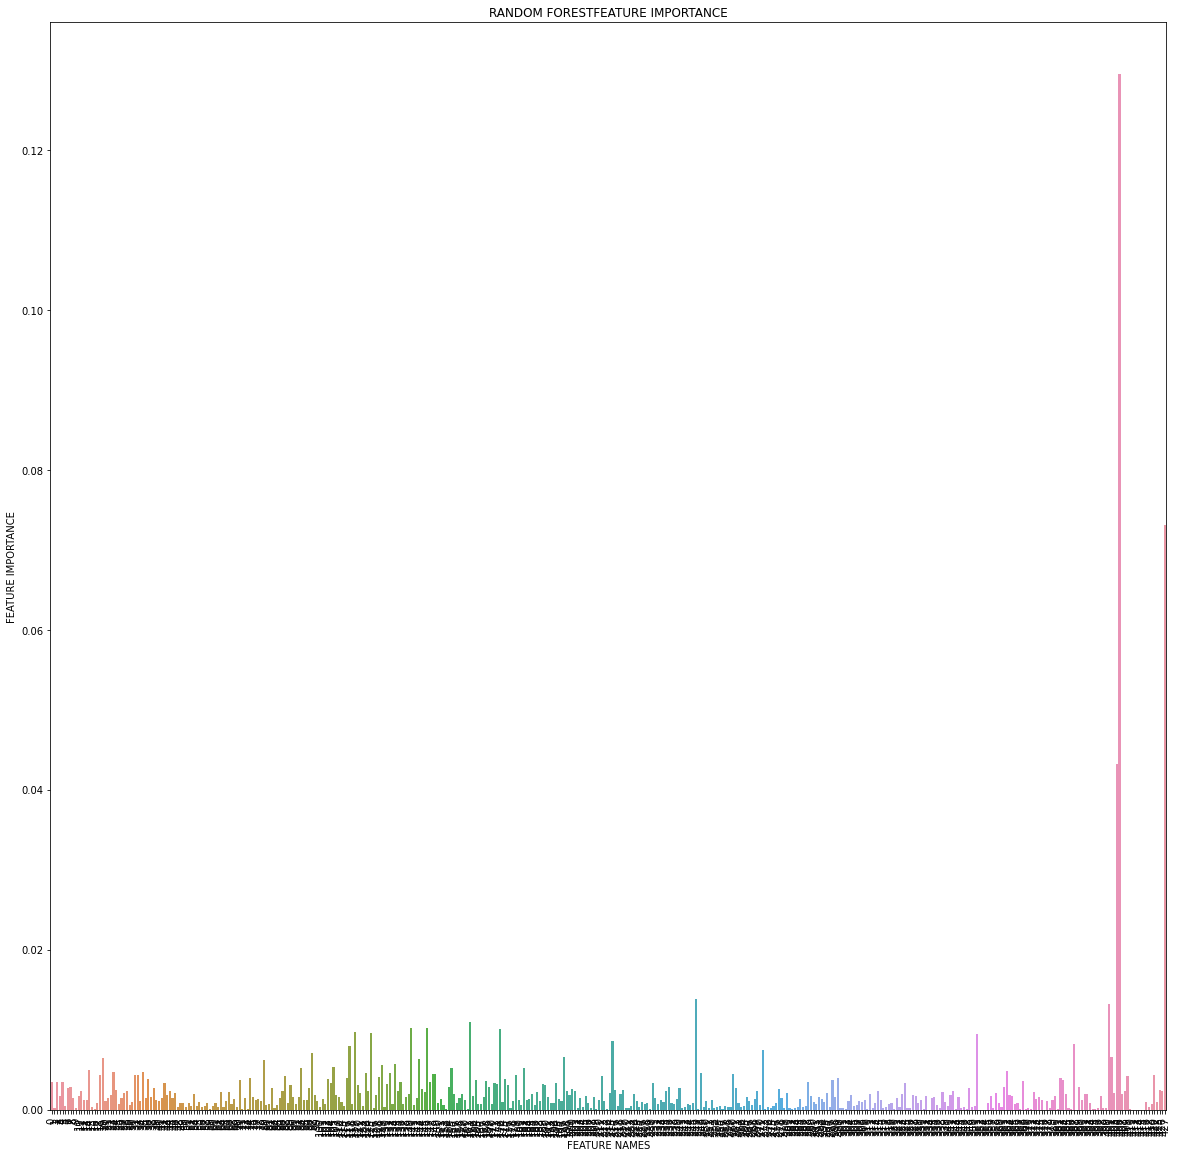

In [28]:
utils.plot_feature_importance(rnd_clf.feature_importances_,x_train_w2v_df.columns,'RANDOM FOREST')

In [29]:
rmse,R2,MAE,MSE,RMSLE,max_error_= metrics(y_test_w2v_df,y_pred_w2vec_rnd)

dict_info['Model'].append('Random Forest')
dict_info['RMSE'].append(rmse)
dict_info['R2'].append(R2)
dict_info['MAE'].append(MAE)
dict_info['RMSLE'].append(RMSLE)
dict_info['max_error_'].append(max_error_)

## MLP

In [30]:
from sklearn.neural_network import MLPRegressor
mlp_GS = MLPRegressor(activation='relu',alpha=0.001,hidden_layer_sizes=(50, 50, 50),learning_rate='constant',solver='adam')
mlp_GS.fit(x_train_w2v_df, y_train_w2v_df)
y_pred_w2vec_mlp = mlp_GS.predict(x_test_w2v_df)

In [31]:
# utils.metrics(y_test_w2v_df,y_pred_mlp)

(0.035355352862510486,
 0.33030179675232574,
 0.015293884787792693,
 0.0012500009760326287,
 -3.3423054734210647,
 0.610817120642467)

In [32]:
rmse,R2,MAE,MSE,RMSLE,max_error_= metrics(y_test_w2v_df,y_pred_w2vec_mlp)

dict_info['Model'].append('MLP')
dict_info['RMSE'].append(rmse)
dict_info['R2'].append(R2)
dict_info['MAE'].append(MAE)
dict_info['RMSLE'].append(RMSLE)
dict_info['max_error_'].append(max_error_)

## SVC

In [33]:
from sklearn.svm import LinearSVR
svr= LinearSVR(C=1.0, dual=True, epsilon=1.5, fit_intercept=True,intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,tol=0.0001, verbose=0)
svr.fit(x_train_w2v_df, y_train_w2v_df)
y_pred_w2vec_SVR = svr.predict(x_test_w2v_df)

In [ ]:
# utils.metrics(y_test_w2v_df,y_pred_SVR)

In [34]:
rmse,R2,MAE,MSE,RMSLE,max_error_= metrics(y_test_w2v_df,y_pred_w2vec_SVR)

dict_info['Model'].append('SVR')
dict_info['RMSE'].append(rmse)
dict_info['R2'].append(R2)
dict_info['MAE'].append(MAE)
dict_info['RMSLE'].append(RMSLE)
dict_info['max_error_'].append(max_error_)

In [35]:
dfData = pd.DataFrame(dict_info)
dfData

,Model,RMSE,R2,MAE,RMSLE,max_error_
0,XGboost,0.029182,0.543754,0.009052,-3.534203,0.643448
1,Random Forest,0.034657,0.356504,0.011940,-3.362261,0.643518
2,MLP,0.035355,0.330302,0.015294,-3.342305,0.610817
3,SVR,0.045590,-0.113524,0.014557,-3.088077,0.806034
